# Colossus tutorial: The splashback radius

The splashback radius has been suggested as a physically motivated definition of the halo boundary. The corresponding Colossus module implements a number of fitting functions for the splashback radius as a function of conventional spherical overdensity definitions, redshift, and mass accretion rate.

In [13]:
from __future__ import print_function 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

As always with Colossus, we need to set a cosmology:

In [2]:
from colossus.cosmology import cosmology
cosmology.setCosmology('planck18');

First, let's import the splashback module and print the names of all available splashback models:

In [3]:
from colossus.halo import splashback

for model_name in splashback.models:
    print(model_name)

adhikari14
more15
shi16
mansfield17
diemer17
diemer20


One thing to watch out for is that different authors mean different things by "splashback radius": the radius where the profile is steepest (``more15``), the radius that includes a certain fraction of particle apocenters (``diemer17``, ``diemer20``), three-dimensional shells (``mansfield17``), or idealized caustics in 1D theoretical models (``adhikari14``, ``shi16``). Comparisons between different models should thus be approached with care.

Let's plot the splashback radius predictions of all models as a function of mass accretion rate for a halo with $M_{\rm 200m} = 10^{12} M_{\odot}/h$ at $z = 0$. Not all models may be able to predict $R_{\rm sp}$ at all mass accretion rates, masses, or redshifts, which is why the function returns a mask indicating which input parameters were valid. 

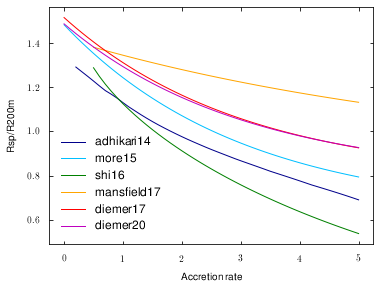

In [9]:
from colossus.lss import peaks

z = 0.0
M200m = 1E12
nu200m = peaks.peakHeight(M200m, z)
Gamma = np.arange(0.0, 5.1, 0.1)

plt.figure()
plt.xlabel('Accretion rate')
plt.ylabel('Rsp/R200m')
for model_name in splashback.models:
    RspR200m, mask = splashback.splashbackModel('RspR200m', Gamma = Gamma, nu200m = nu200m, z = z, 
                                model = model_name, rspdef = 'sp-apr-p75', statistic = 'median')
    plt.plot(Gamma[mask], RspR200m, label = model_name.replace('_', '\_'))
plt.legend();

Here we have chosen the 75th percentile of apocenters as the definition for the particle-dynamics-based models. 

Some models can also predict the splashback mass and radius based only on mass (or peak height). The capabilities of the models are recorded in the models dictionary which we check to filter for models that can handle ``nu200m`` as an input quantity:

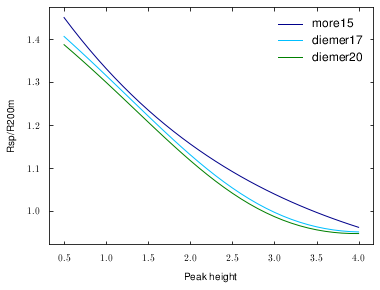

In [14]:
nu200m = np.arange(0.5, 4.1, 0.1)

plt.figure()
plt.xlabel('Peak height')
plt.ylabel('Rsp/R200m')
for model_name in splashback.models:
    if 'nu200m' in splashback.models[model_name].q_in:
        RspR200m, mask = splashback.splashbackModel('RspR200m', nu200m = nu200m, z = z, 
                                    model = model_name, rspdef = 'sp-apr-p75', statistic = 'median')
        plt.plot(nu200m[mask], RspR200m, label = model_name.replace('_', '\_'))
plt.legend();

For convenience, the `splashbackRadius()` function provides a wrapper to compute the splashback radius and mass in physical coordinates rather than the ratios provided by the models:

In [10]:
z = 0.0
mdef = 'vir'
Mvir = 1E12
cvir = 10.0

Rsp, Msp, _ = splashback.splashbackRadius(z, mdef, M = Mvir, c = cvir, rspdef = 'sp-apr-p90')
print(Rsp, Msp)

332.75341749486523 1279106779118.2488


In this case, we did not tell the function what the mass accretion rate is. This worked because the default model, `diemer20`, can predict $R_{\rm sp}$ as a function of only the halo mass as well. However, the estimate will be much more accurate if we also provide a mass accretion rate:

In [15]:
Rsp, Msp, _ = splashback.splashbackRadius(z, mdef, M = Mvir, c = cvir, Gamma = 3.0, rspdef = 'sp-apr-p90')
print(Rsp, Msp)

322.4707601265228 1264952137635.1763
